## How to do integer encoding using keras

In [2]:
import numpy as np
import pandas as pd
import nltk
import tensorflow
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import LSTM,Dense , SimpleRNN , Embedding , Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import string
# from textblob import TextBlob
import joblib

In [3]:
len(open('data/train.txt','r').readlines())

16000

In [4]:
len(open('data/test.txt','r').readlines())

2000

In [5]:
len(open('data/val.txt','r').readlines())

2000

In [6]:
open('data/val.txt','r').readlines()[0]
# printing first element of dataset

'im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n'

In [7]:
# reading the data from .txt file

train = open('data/train.txt','r').readlines()
test = open('data/test.txt','r').readlines()
val = open('data/val.txt','r').readlines()

In [8]:
full_data = train + test + val
len(full_data)

20000

## creating independent and dependent variable

In [9]:
# extracting X and Y variable

x = []
y = []
for item in full_data:
    text,label = item.split(';')
    label = label.replace('\n','')
    x.append(text)
    y.append(label)

## Text cleaning steps

In [10]:
# first we will do lowerise all the text
# second we will perform word tokenization
# third we will remove stopwords
# fourth we will perform stemming or lemmataization on each word
# then make a clean text 
stem = PorterStemmer()

def text_cleaning(sentences):
    clean_text = []
    for sent in sentences:
        lower_sent = sent.lower()   # first lowerising the sentence
        word_tokenize = nltk.word_tokenize(sent)   #performing word_tokenization
        removed_stop_words = [word for word in word_tokenize if word not in stopwords.words('english')]  # remove stopwords
        stemmed_sent = [stem.stem(word) for word in removed_stop_words]  # apply stemming
        cleaned = " ".join(stemmed_sent)  # joining our final words
        clean_text.append(cleaned)      # appending cleaned text in a separate list
    return clean_text

In [11]:
cleaned_data = text_cleaning(x)

In [12]:
x[5]

# original text

'ive been feeling a little burdened lately wasnt sure why that was'

In [13]:
cleaned_data[5]
# after cleaning

'ive feel littl burden late wasnt sure'

## Tokenaization

In [14]:
## creating the object Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')
# we can also pass num_word parameter

In [15]:
tokenizer.fit_on_texts(cleaned_data)
#we are fitting tokenizer on our cleaned dataset

In [16]:
tokenizer.word_index
joblib.dump(tokenizer.word_index,'word_index_tokens.lb')
# to check initialize tokens for the word it return a dict, key -> word , value -> initialized token no.

['word_index_tokens.lb']

In [17]:
tokenizer.word_counts
# to check no. of count of words

OrderedDict([('didnt', 334),
             ('feel', 21204),
             ('humili', 69),
             ('go', 1101),
             ('hopeless', 81),
             ('damn', 54),
             ('hope', 320),
             ('around', 382),
             ('someon', 335),
             ('care', 254),
             ('awak', 22),
             ('im', 3055),
             ('grab', 22),
             ('minut', 79),
             ('post', 234),
             ('greedi', 79),
             ('wrong', 152),
             ('ever', 260),
             ('nostalg', 63),
             ('fireplac', 3),
             ('know', 1192),
             ('still', 743),
             ('properti', 5),
             ('grouchi', 35),
             ('ive', 723),
             ('littl', 932),
             ('burden', 95),
             ('late', 167),
             ('wasnt', 119),
             ('sure', 310),
             ('take', 403),
             ('milligram', 1),
             ('time', 1215),
             ('recommend', 19),
             ('amoun

In [18]:
tokenizer.document_count
# to check total no. of sentences

20000

In [19]:
sequences = tokenizer.texts_to_sequences(cleaned_data)
sequences[0:5]

# tokenize the input sentences as a sequence 

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [20]:
sequences = pad_sequences(sequences,padding='post',maxlen=35)
sequences[0:3]
# to equalize the length of input sequences

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [21]:
unique_labels = list(pd.Series(np.array(y)).unique())
no_of_class = len(unique_labels)

unique_labels , no_of_class
## to finding unique labels and no. of class

(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], 6)

## Label encoding

In [22]:
label_dict = {
    'sadness':0,
    'anger':1,
    'love':2,
    'surprise':3,
    'fear':4,
    'joy':5
}
def label_encoder(labels):
    label = []
    for lab in labels:
        label.append(label_dict[lab])
    label = np.array(label)
    return label

label = label_encoder(y)
label[0:5]

# to perform label encoding

array([0, 0, 1, 2, 1])

In [23]:
sequences.shape , label.shape

((20000, 35), (20000,))

## spliting our dataset into train and test sample

In [24]:
x_train,x_test,y_train,y_test = train_test_split(sequences,label,test_size=0.2,random_state=42)

In [25]:
x_train.shape,    x_test.shape    ,  y_test.shape    ,  y_train.shape 

((16000, 35), (4000, 35), (4000,), (16000,))

## Model Defining
<p>model can be define in a two way.</p>
<ul>
    <li>sequential model</li>
    <li>functional model</li>
    </ul>

### Sequential SimpleRNN model defination

In [26]:
# sequential SimpleRNN model defining
model = Sequential()
model.add(SimpleRNN(32,input_shape=(35,1),return_sequences=False))
model.add(Dense(no_of_class,activation='softmax'))



## compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
# return_sequence = False  --> means if you don,t want to stack again this model then specify False

C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape           ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)         │ (None, 32)             │        1,088 │
├────────────────────────────────┼────────────────────────┼──────────────┤
│ dense (Dense)                  │ (None, 6)              │          198 │
└────────────────────────────────┴────────────────────────┴──────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train,y_train,epochs=1)

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3116 - loss: 1.6177


## prediction with SimpleRNN

In [28]:
np.expand_dims(sequences[0], axis=0)

# i am expanding dimension of my numpy array, because model is expecting 2D array

array([[ 61,   2, 522,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [29]:
pred = model.predict(np.expand_dims(sequences[5], axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


array([[0.288813  , 0.15445714, 0.07390119, 0.03421041, 0.1250597 ,
        0.32355857]], dtype=float32)

In [37]:
unique_labels[np.argmax(pred)]      #, unique_labels[label[5]]

'joy'

## LSTM model defining

Here are the parameters of the Embedding layer and what they do:

- input_dim:  This is the size of the vocabulary, i.e., the total number of unique words in your dataset. Each word is assigned a unique integer index. For example, if you have 10,000 unique words, input_dim would be set to 10000.
<br>
- output_dim: This is the dimension of the dense embedding. It determines the size of the dense vector that will represent each word. A higher value will result in a more expressive representation, but it will also increase the computational complexity of the model.
<br>
- input_length: This is the length of each input sequence. If you are processing sentences, this would be the number of words in a sentence. For example, if you are using sequences of length 35, you would set input_length=35.

In [31]:
# Define the model
model = Sequential([
    LSTM(units=64, input_shape=(35, 1), return_sequences=True),
    LSTM(units=64),
    Dense(units=6, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
history = model.fit(x_train,y_train,epochs=25)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3311 - loss: 1.5990
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.3351 - loss: 1.5699
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.3362 - loss: 1.5731
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3307 - loss: 1.5836
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.3367 - loss: 1.5736
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.3435 - loss: 1.5670
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.3434 - loss: 1.5694
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.3411 - loss: 1.5678
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.3449 - loss: 1.5775
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.3429 - loss: 1.5745
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.3505 - loss: 1.5612
Epoch 12/25
500/500 ━━━━━━━━━━

<Axes: >

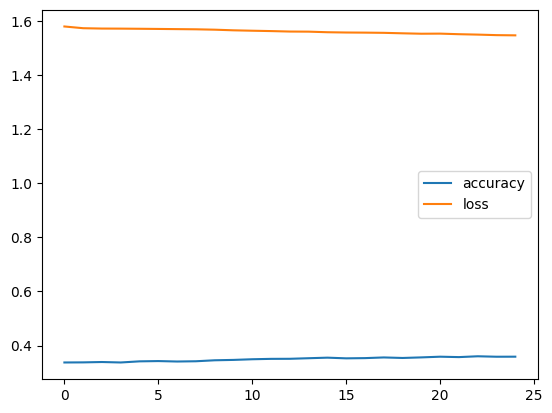

In [33]:
pd.DataFrame(model.history.history).plot()

## Prediction With LSTM

In [34]:
prediction = model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [35]:
predicted_class_index = np.argmax(prediction,axis=1)
predicted_class_index

array([5, 0, 5, ..., 0, 5, 0], dtype=int64)

In [36]:
y_test

array([1, 5, 0, ..., 1, 5, 5])

In [41]:
#updated model
from tensorflow.keras.optimizers import Adam
model3 = Sequential([
    LSTM(units=128, input_shape=(35, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=128),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dense(units=6, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model3.fit(x_train,y_train,epochs=25)


Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.3212 - loss: 1.6036
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.3277 - loss: 1.5793
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.3359 - loss: 1.5779
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.3428 - loss: 1.5677
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.3451 - loss: 1.5720
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.3488 - loss: 1.5653
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.3392 - loss: 1.5758
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.3491 - loss: 1.5690
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.3419 - loss: 1.5649
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.3460 - loss: 1.5658
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.3442 - loss: 1.5769
Epoch 12/25
500/500 ━━━━━━━━━━

## wait for with  embadding layer 😋

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
vocab_size = 10000  # Size of the vocabulary
embedding_dim = 128  # Dimension of the embedding vectors
input_length = 35  # Length of input sequences

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    LSTM(units=128),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dense(units=6, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])